# Analysis of Spotify Chart

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (5, 5)
import seaborn as sns
from IPython.core.pylabtools import figsize

In [2]:
#import dataframe
file_name = "spotify_utf.csv"
df_data = pd.read_csv(file_name)
df_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928/9/25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [3]:
#clean up the data
df_data_clear = df_data.drop(columns=['id','release_date','mode'])
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['year']<1950].index)
df_data_clear = df_data_clear.drop(df_data_clear[df_data_clear['popularity']<=2].index)
df_data_clear.duplicated().sum()
df_data_clear = df_data_clear[~df_data_clear.duplicated()==1]
df_data_clear.shape

#set 'year' as an index
df_data_clear.index= pd.to_datetime(df_data_clear['year'], format='%Y')
df_data_clear.head(2).append(df_data_clear.tail(2))

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,name,popularity,speechiness,tempo,valence,year
year,,,,,,,,,,,,,,,,
1950-01-01,0.9850,"['Franz Schubert', 'Isaac Stern']",0.364,248627,0.0552,0,0.537,2,0.0946,-23.253,"Sonata for Violin and Piano No. 1 in D Major, ...",4,0.0438,123.672,0.318,1950
1951-01-01,0.0550,"['Marika Rossa', 'Alberto Ruiz']",0.754,330000,0.7390,0,0.871,7,0.1090,-6.333,Back To The Old School ( V2 ) - Original Stick,13,0.0636,128.005,0.212,1951
2020-01-01,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,0.000,1,0.2220,-2.557,I Found You,70,0.0385,129.916,0.472,2020
2020-01-01,0.1090,['Ingrid Andress'],0.512,214787,0.4280,0,0.000,0,0.1050,-7.387,More Hearts Than Mine,65,0.0271,80.588,0.366,2020


In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = ['duration_ms','loudness','tempo','acousticness','danceability','energy','explicit','speechiness','key','valence','instrumentalness','liveness']
df_data_clear[features] = scaler.fit_transform(df_data_clear[features])
df_data_clear[features]

,duration_ms,loudness,tempo,acousticness,danceability,energy,explicit,speechiness,key,valence,instrumentalness,liveness
year,,,,,,,,,,,,
1950-01-01,0.043408,0.576478,0.506663,0.988956,0.368421,0.0552,0.0,0.045342,0.181818,0.3180,0.537000,0.0946
1951-01-01,0.058509,0.841915,0.524415,0.055221,0.763158,0.7390,0.0,0.065839,0.636364,0.2120,0.871000,0.1090
1952-01-01,0.025606,0.669726,0.340348,0.993976,0.623482,0.1210,0.0,0.066356,0.363636,0.8480,0.771000,0.3160
1952-01-01,0.033533,0.718577,0.283730,0.869478,0.671053,0.1500,0.0,0.333333,0.636364,0.6430,0.000000,0.0758
1953-01-01,0.102838,0.466867,0.275754,0.982932,0.186235,0.0233,0.0,0.038095,1.000000,0.0822,0.947000,0.0940
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,0.027667,0.824219,0.409732,0.173695,0.885628,0.4430,1.0,0.148033,0.090909,0.3060,0.000032,0.0891
2020-01-01,0.028348,0.770159,0.524395,0.016767,0.727733,0.3850,0.0,0.041718,0.727273,0.2700,0.031300,0.1110
2020-01-01,0.030803,0.794867,0.506778,0.540161,0.520243,0.5390,0.0,0.108696,0.636364,0.1530,0.002330,0.1080


In [5]:
# Resample to yearly frequency, aggregating with mean
import matplotlib.pyplot as plt
df_yearly_mean = df_data_clear[features].resample('Y').mean()
df_yearly_mean

,duration_ms,loudness,tempo,acousticness,danceability,energy,explicit,speechiness,key,valence,instrumentalness,liveness
year,,,,,,,,,,,,
1950-12-31,0.033404,0.722550,0.473806,0.810993,0.536851,0.316068,0.014831,0.081625,0.466294,0.555480,0.238112,0.209584
1951-12-31,0.031227,0.713554,0.467778,0.855983,0.513747,0.281198,0.008850,0.091744,0.454867,0.515764,0.299033,0.191138
1952-12-31,0.030818,0.710223,0.452909,0.833885,0.497162,0.275759,0.000000,0.082488,0.439304,0.511692,0.247665,0.186417
1953-12-31,0.038170,0.709510,0.457670,0.868639,0.463790,0.293592,0.008741,0.064380,0.461380,0.455676,0.346245,0.199191
1954-12-31,0.037601,0.708644,0.446906,0.858273,0.477139,0.264096,0.000000,0.072319,0.446666,0.457077,0.266595,0.201073
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31,0.037985,0.816549,0.487811,0.281415,0.607264,0.592877,0.333164,0.111075,0.475045,0.430769,0.074646,0.180198
2017-12-31,0.036117,0.809140,0.478750,0.290920,0.619770,0.586774,0.349175,0.115728,0.461185,0.414315,0.098258,0.194262
2018-12-31,0.034551,0.827450,0.499923,0.273168,0.673061,0.590527,0.468234,0.132697,0.486289,0.447193,0.035966,0.171714


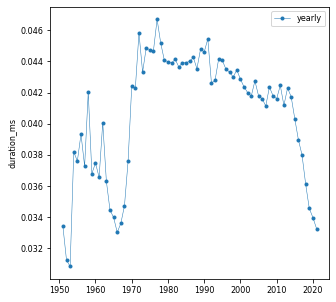

In [6]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'duration_ms'],
marker='.', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('duration_ms')
ax.legend();

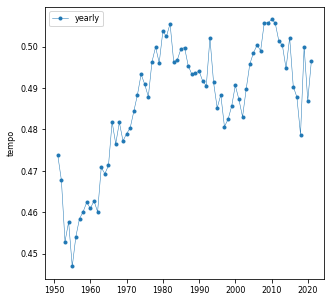

In [7]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'tempo'],
marker='.', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('tempo')
ax.legend();

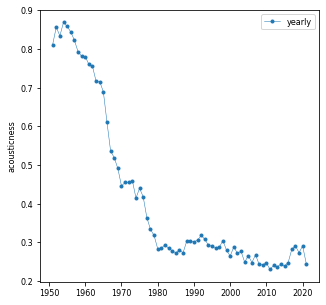

In [8]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'acousticness'],
marker='.', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('acousticness')
ax.legend();

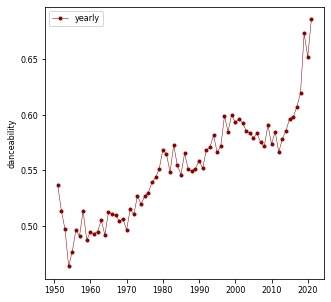

In [9]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'danceability'],
marker='.', color='#8B0000', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('danceability')
ax.legend();

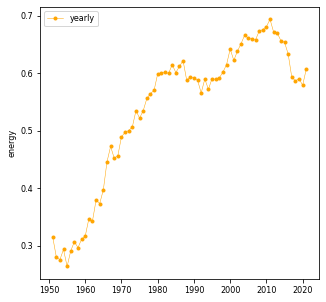

In [10]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'energy'],
marker='.', color='#FFA500', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('energy')
ax.legend();

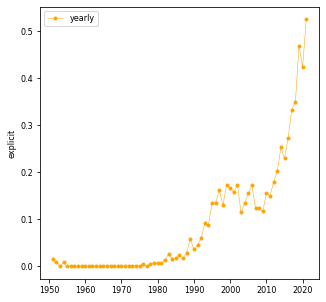

In [11]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'explicit'],
marker='.', color='#FFA500', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('explicit')
ax.legend();

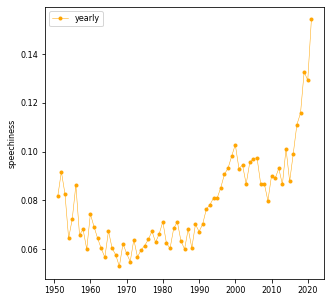

In [12]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'speechiness'],
marker='.', color='#FFA500', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('speechiness')
ax.legend();

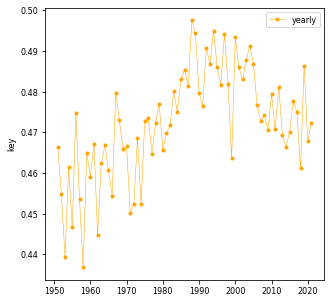

In [13]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'key'],
marker='.', color='#FFA500', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('key')
ax.legend();

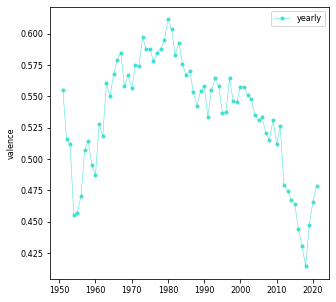

In [14]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'valence'],
marker='.', color='#40E0D0', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('valence')
ax.legend();

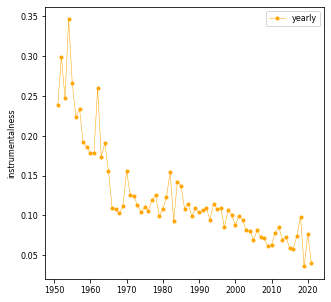

In [15]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'instrumentalness'],
marker='.', color='#FFA500', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('instrumentalness')
ax.legend();

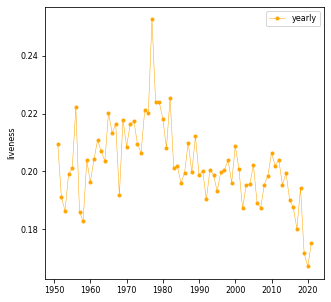

In [16]:
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots()
ax.plot(df_yearly_mean.loc[start:end, 'liveness'],
marker='.', color='#FFA500', linestyle='-', linewidth=0.5, label='yearly')
ax.set_ylabel('liveness')
ax.legend();

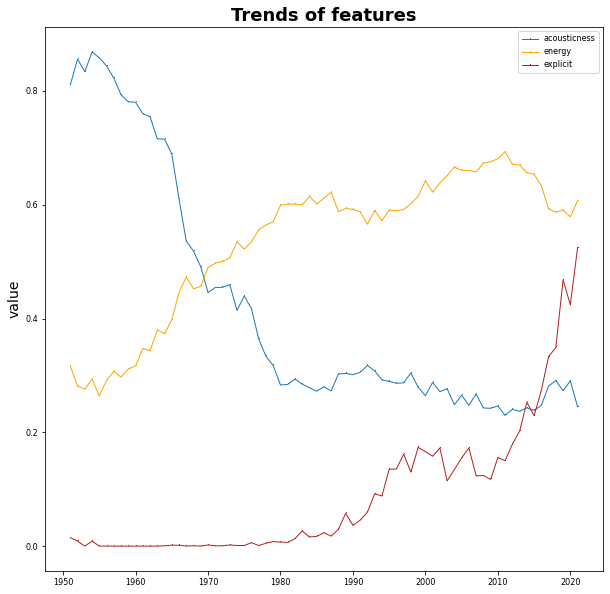

In [19]:
#Time-series
#Trends of features
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(df_yearly_mean.loc[start:end, 'acousticness'],
marker=',', linestyle='-', linewidth=1, label='acousticness')
ax.plot(df_yearly_mean.loc[start:end, 'energy'],
marker=',', color='#FFA500', linestyle='-', linewidth=1, label='energy')
ax.plot(df_yearly_mean.loc[start:end, 'explicit'],
marker=',', color='#B22222', linestyle='-', linewidth=1, label='explicit')
ax.set_ylabel('value',fontsize =14)
ax.set_title('Trends of features', fontsize =18,weight='bold')
ax.legend();

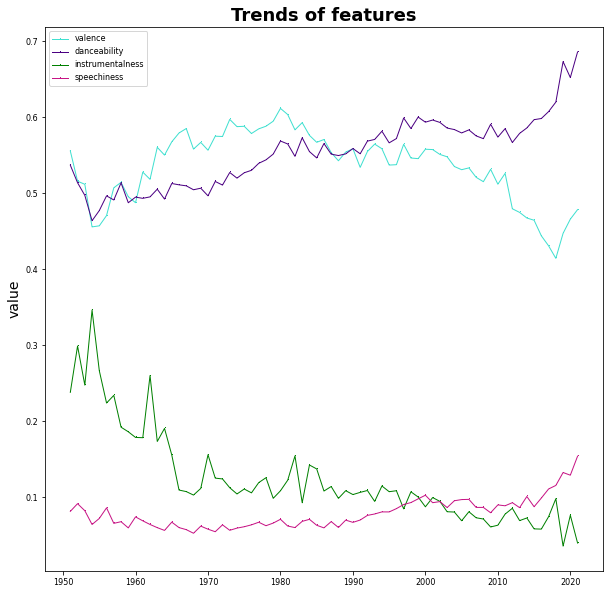

In [21]:
#Time-series
#Trends of features
start, end = '1950-12-31', '2020-12-31'

fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(df_yearly_mean.loc[start:end, 'valence'],
marker=',', color='#40E0D0', linestyle='-', linewidth=1, label='valence')
ax.plot(df_yearly_mean.loc[start:end, 'danceability'],
marker=',', color='#4B0082', linestyle='-', linewidth=1, label='danceability')
ax.plot(df_yearly_mean.loc[start:end, 'instrumentalness'],
marker=',', color='#008000', linestyle='-', linewidth=1, label='instrumentalness')
ax.plot(df_yearly_mean.loc[start:end, 'speechiness'],
marker=',', color='#C71585', linestyle='-', linewidth=1, label='speechiness')
ax.set_ylabel('value',fontsize =14)
ax.set_title('Trends of features', fontsize =18,weight='bold')
ax.legend();